# Mapping Estuaries in South Africa

## Estuaries

An estuary is a semi-enclosed coastal body of water that has a free connection with the open sea at one side and a river on the other side. Therefore in estuaries the saline waters of the ocean meet with the fresh water of the rivers. Structurally, they are deep funnel shaped mouths. The circulation of water in any estuary depends on the amount of fresh water outflow, the strength of the tidal current and the amount of vertical mixing. Estuarine waters are therefore salty or brackish in quality. Brackish water contains between 0.5 and 30 grams of salt per liter - more often expressed as 0.5 to 30 parts per thousand (ppt), which is a specific gravity of between 1.0004 and 1.0226. Water with a salt concentration greater than 30 ppt is considered saline. Estuaries are complex ecosystems comprising of three zones, polyhaline zone (fully saline), mesohaline (medium salt, 5-18 ppt) and oligohaline zone (low salt, 0.5-5.0 ppt). 

Estuaries are dynamic and productive ecosystems because of the accumulation nutrients derived from form a large catchment area of a river. Because of this they have an abundant food supply for aquatic biota such as fish, and therefore offer good fishing grounds. Also the easily accessible and shallow water column make ideal breeding and nursing grounds for a wide variety of fish, shrimp, oysters and prawn species.

The South African coastline stretches for nearly 3 000 km from Kosi Bay near the Mozambique border in the east of the country to the Orange river at the Namibian border in the west. South Africa has a range of estuary types that occur across three climate regions; cool temperate, warm temperate and subtropical. The cool temperate region in the west coast streches from the Orange River Estuary to Cape Point. The warm temperate region extends approximately from Cape Point to the Mbashe Estuary. The subtropical region spans from the Mbashe Estuary to Kosi Bay along the east coast.

Estuaries located in the cool temperate regions tend to have high salinity and low turbidity as a result of low rainfall and runoff, high seawater input and evaporative loss, while lower salinity and higher turbidity charactirises estuaries in the subtropical regions due to relatively high runoff. There are approximately 290 functional estuaries that have been identified in South Africa. These estuarine systems are composed of temporarily open/closed estuaries, permanently open estuaries, estuarine lakes, estuarine bays and river mouths.

### References

- Balasubramanian, A. Aquatic Ecosytems-Marine Types (University of Mysore, 2011 (Accessed March 2020)).        https://www.researchgate.net/publication/310021416.
- Cotiyane, P., Adams, J. B. & Rajkaran, A. Relating microalgal response to nutrient status in a mangrove-dominated estuary. Hydrobiologia 843, 183–199 (2019).
- Van Deventer, H. *et al*. National wetland map 5: An improved spatial extent and representation of inland aquatic and estuarine ecosystems in south africa. Water SA 46, 66–79 (2020).
- Nunes, M., Adams, J. B. & Van Niekerk, L. Changes in invasive alien aquatic plants in a small closed estuary. South African Journal of Botany 135, 317–329 (2020).
- Magoro, M. L. *et al*. Characterisation of selected micro-estuaries and micro-outlets in South Africa using microalgal, zooplanktonic and macrozoobenthic assemblages. African Journal of Aquatic Science 44, 313–327 (2019).
- Veldkornet, D. A. & Rajkaran, A. Predicting shifts in the geographical distribution of two estuarine plant species from the subtropical and temperate regions of south africa. Wetlands 39, 1179–1188 (2019).
- 'https://en.wikipedia.org/wiki/List_of_estuaries_of_South_Africa'.

![title](img/Estuaries_in_SA.jpg)

### <font color='green'>Top Left and Right: Different views bof the Mbashe Estuary in the Eastern Cape Province. Bottom left: The Orange river estuary situated in the Nothern Cape Province, bottom right is the Kynsa estuary located in the Western Cape.</font><br>

## PART 1: DATA MUNGING

A notebook showing an example of geospatial analysis involving mapping of estuaries in South Africa. The main table in this analysis scrapped from the wikipedia page: 'https://en.wikipedia.org/wiki/List_of_estuaries_of_South_Africa'.

In [1]:
# web scrapping info from Wikipedia url

import requests
from bs4 import BeautifulSoup

url = 'https://en.wikipedia.org/wiki/List_of_estuaries_of_South_Africa'

r = requests.get(url)
html_contents = r.text
html_soup = BeautifulSoup(html_contents, 'html.parser')


#file_html = open('sa_estuaries_rawdata_html.txt', 'r', encoding='utf-8')
#text_html = file_html.readlines()
#raw_soup = BeautifulSoup(text_html, 'html.parser')

estuaries_list = []

estuaries_tables = html_soup.find_all('table', class_='wikitable sortable')

for table in estuaries_tables:
    headers = []
    rows = table.find_all('tr')
    
    # Start by fetching the header cells from the first row to determine
    # the field names
    for header in table.find('tr').find_all('th'):
        headers.append(header.text)
        
    # Then go through all the rows except the first one
    for row in table.find_all('tr')[1:]:
        values = []
        # And get the column cells, the first one being inside a th-tag
        for col in row.find_all(['th','td']):
            values.append(col.text)
        if values:
            estuaries_dict = {headers[i]: values[i] for i in range(len(values))}
            estuaries_list.append(estuaries_dict)
                
# Show the results
for estuary in estuaries_list:
    print(estuary)

{'Name\n': 'Kosi Bay Estuary', 'Drainage area in Km²\n': '304', 'Province and location\n': 'KwaZulu-Natal, border Mozambique', 'River Name\n': '', 'Coördinates\n': '26°54′S 32°52′E\ufeff / \ufeff26.900°S 32.867°E\ufeff / -26.900; 32.867', 'Summary / Remarks\n': 'Kosi Bay (26° 54’ S; 32° 53’E) drains into the Indian Ocean, and is situated on the east (KwaZulu-Natal) coast near the Mozambique border. This system has a catchment area of approximately 304\xa0km2.\n'}
{'Name\n': 'St Lucia Estuary', 'Drainage area in Km²\n': '9 542', 'Province and location\n': 'KwaZulu-Natal, Richards Bay', 'River Name\n': '', 'Coördinates\n': '28°23′S 32°25′E\ufeff / \ufeff28.383°S 32.417°E\ufeff / -28.383; 32.417', 'Summary / Remarks\n': 'The St Lucia estuary (28° 23’ S; 32° 25’E) drains into the Indian Ocean, and is situated north of the coastal town of Richards Bay in KwaZulu-Natal. It is the largest estuarine system in the country and has a catchment area of approximately 9 542\xa0km2.\n'}
{'Name\n': 'M

In [2]:
%%HTML    
<style type="text/css">
table > thead > tr > th {
background-color: #777;
color: white;
}
table.dataframe td, table.dataframe th {
border-style: solid;
border: 1px solid skyblue;
}
</style>

In [3]:
import pandas as pd

estuaries_df = pd.DataFrame(estuaries_list[1:], columns=estuaries_list[0]) # create the data frame from lists of lists using pandas
estuaries_df.head() # view the first 5 rows

,Name\n,Drainage area in Km²\n,Province and location\n,River Name\n,Coördinates\n,Summary / Remarks\n
0,St Lucia Estuary,9 542,"KwaZulu-Natal, Richards Bay",,28°23′S 32°25′E﻿ / ﻿28.383°S 32.417°E﻿ / -28.3...,The St Lucia estuary (28° 23’ S; 32° 25’E) dra...
1,Mfolozi/Msunduzi Estuary,11 068,"KwaZulu-Natal, Richards Bay","Mfolozi River, and Msunduzi River",28°24′S 32°25′E﻿ / ﻿28.400°S 32.417°E﻿ / -28.4...,The Mfolozi/Msunduzi estuary (28° 24’ S; 32° 2...
2,Richards Bay/Mhlathuze Estuary,3 670,"KwaZulu-Natal, Richards Bay",Mhlathuze River,28°51′S 32°03′E﻿ / ﻿28.850°S 32.050°E﻿ / -28.8...,The Richards Bay/Mhlathuze system (28° 51’ S; ...
3,Mlalazi Estuary,492,"KwazUlu-Natal, Richards Bay",Mlalazi River,28°57′S 31°49′E﻿ / ﻿28.950°S 31.817°E﻿ / -28.9...,The Mlalazi estuary (28° 57’ S; 31° 49’E) drai...
4,Matigulu/Nyoni Estuary,900,"KwazUlu-Natal, Richards Bay",Matigulu River and Nyoni River,29°05′S 31°38′E﻿ / ﻿29.083°S 31.633°E﻿ / -29.0...,The Matigulu/Nyoni system (29° 05’ S; 31° 38’E...


In [4]:
estuaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name
                   61 non-null     object
 1   Drainage area in Km²
   61 non-null     object
 2   Province and location
  61 non-null     object
 3   River Name
             61 non-null     object
 4   Coördinates
            61 non-null     object
 5   Summary / Remarks
      61 non-null     object
dtypes: object(6)
memory usage: 3.0+ KB


In [5]:
estuaries_df.shape

(61, 6)

In [6]:
estuaries_df.columns.values.tolist() # list columns names retrieved from the table

['Name\n',
 'Drainage area in Km²\n',
 'Province and location\n',
 'River Name\n',
 'Coördinates\n',
 'Summary / Remarks\n']

In [7]:
pd.set_option('display.max_rows', None)
estuaries_df

,Name\n,Drainage area in Km²\n,Province and location\n,River Name\n,Coördinates\n,Summary / Remarks\n
0,St Lucia Estuary,9 542,"KwaZulu-Natal, Richards Bay",,28°23′S 32°25′E﻿ / ﻿28.383°S 32.417°E﻿ / -28.3...,The St Lucia estuary (28° 23’ S; 32° 25’E) dra...
1,Mfolozi/Msunduzi Estuary,11 068,"KwaZulu-Natal, Richards Bay","Mfolozi River, and Msunduzi River",28°24′S 32°25′E﻿ / ﻿28.400°S 32.417°E﻿ / -28.4...,The Mfolozi/Msunduzi estuary (28° 24’ S; 32° 2...
2,Richards Bay/Mhlathuze Estuary,3 670,"KwaZulu-Natal, Richards Bay",Mhlathuze River,28°51′S 32°03′E﻿ / ﻿28.850°S 32.050°E﻿ / -28.8...,The Richards Bay/Mhlathuze system (28° 51’ S; ...
3,Mlalazi Estuary,492,"KwazUlu-Natal, Richards Bay",Mlalazi River,28°57′S 31°49′E﻿ / ﻿28.950°S 31.817°E﻿ / -28.9...,The Mlalazi estuary (28° 57’ S; 31° 49’E) drai...
4,Matigulu/Nyoni Estuary,900,"KwazUlu-Natal, Richards Bay",Matigulu River and Nyoni River,29°05′S 31°38′E﻿ / ﻿29.083°S 31.633°E﻿ / -29.0...,The Matigulu/Nyoni system (29° 05’ S; 31° 38’E...
5,Thukela (tugela) Estuary,29 101,"KwaZulu-Natal, between Richards Bay and Durban",Tugela River,29°13′S 31°30′E﻿ / ﻿29.217°S 31.500°E﻿ / -29.2...,The Thukela system (29° 13’ S; 31° 30’E) drain...
6,Mvoti Estuary,2 829,"KwaZulu-Natal, north of Durban",Mvoti River,29°24′S 31°20′E﻿ / ﻿29.400°S 31.333°E﻿ / -29.4...,The Mvoti estuary (29° 24’ S; 31° 20’E) drains...
7,Mgeni Estuary,4 432,"KwaZulu-Natal, Durban",Mgeni River,29°48′S 31°02′E﻿ / ﻿29.800°S 31.033°E﻿ / -29.8...,The Mgeni estuary (29° 48’ S; 31° 02’E) drains...
8,Durban Bay,264,"KwaZulu-Natal, Durban",,29°52′S 31°04′E﻿ / ﻿29.867°S 31.067°E﻿ / -29.8...,Durban Bay (29° 52’ S; 31° 04’E) drains into t...
9,Mkomazi Estuary,4 310,"KwaZulu-Natal, south of Durban",Mkomazi River,30°12′S 30°48′E﻿ / ﻿30.200°S 30.800°E﻿ / -30.2...,The Mkomazi estuary (30° 12’ S; 30° 48’E) drai...


In [8]:
# pd.set_option('max_colwidth', 400)

In [9]:
# change column names
estuaries_df.rename(columns = {'Name\n': 'Name', 'Drainage area in Km²\n': 'Drainage_Area',
                         'Province and location\n': 'Province_Location', 
                         'River Name\n': 'River', 'Coördinates\n': 'GIS_Coordinates', 
                         'Summary / Remarks\n': 'Remarks'}, inplace=True)

estuaries_df.head()

,Name,Drainage_Area,Province_Location,River,GIS_Coordinates,Remarks
0,St Lucia Estuary,9 542,"KwaZulu-Natal, Richards Bay",,28°23′S 32°25′E﻿ / ﻿28.383°S 32.417°E﻿ / -28.3...,The St Lucia estuary (28° 23’ S; 32° 25’E) dra...
1,Mfolozi/Msunduzi Estuary,11 068,"KwaZulu-Natal, Richards Bay","Mfolozi River, and Msunduzi River",28°24′S 32°25′E﻿ / ﻿28.400°S 32.417°E﻿ / -28.4...,The Mfolozi/Msunduzi estuary (28° 24’ S; 32° 2...
2,Richards Bay/Mhlathuze Estuary,3 670,"KwaZulu-Natal, Richards Bay",Mhlathuze River,28°51′S 32°03′E﻿ / ﻿28.850°S 32.050°E﻿ / -28.8...,The Richards Bay/Mhlathuze system (28° 51’ S; ...
3,Mlalazi Estuary,492,"KwazUlu-Natal, Richards Bay",Mlalazi River,28°57′S 31°49′E﻿ / ﻿28.950°S 31.817°E﻿ / -28.9...,The Mlalazi estuary (28° 57’ S; 31° 49’E) drai...
4,Matigulu/Nyoni Estuary,900,"KwazUlu-Natal, Richards Bay",Matigulu River and Nyoni River,29°05′S 31°38′E﻿ / ﻿29.083°S 31.633°E﻿ / -29.0...,The Matigulu/Nyoni system (29° 05’ S; 31° 38’E...


In [10]:
estuaries_df.tail()

,Name,Drainage_Area,Province_Location,River,GIS_Coordinates,Remarks
56,Diep Estuary,1 495,"Western Cape, near Cape Town",Diep River,33°53′S 18°28′E﻿ / ﻿33.883°S 18.467°E﻿ / -33.8...,The Diep estuary (33° 53’ S; 18° 28’E) drains ...
57,Berg Estuary,7 715,"Western Cape, north of Cape Town",Berg River,32°46′S 18°09′E﻿ / ﻿32.767°S 18.150°E﻿ / -32.7...,The Berg estuary (32° 46’ S; 18° 09’E) drains ...
58,Verloren Estuary,1 895,"Western Cape, north of Cape Town",Verlorenvlei River,32°19′S 18°20′E﻿ / ﻿32.317°S 18.333°E﻿ / -32.3...,The Verlore system (32° 19’ S; 18° 20’E) is lo...
59,Olifants Estuary,46 220,"Western Cape, north of Cape Town",Olifants River,31°42′S 18°11′E﻿ / ﻿31.700°S 18.183°E﻿ / -31.7...,The Olifants estuary (31° 42’ S; 18° 11’E) is ...
60,Orange Estuary (Gariep),"549,700",Northern Cape border Namibia north of Port Nol...,Orange River,28°38′S 16°27′E﻿ / ﻿28.633°S 16.450°E﻿ / -28.6...,The Gariep (Orange) system (28° 38’ S; 16° 27’...


In [11]:
# After reviewing the data frame, we see that row 60 it's value of land area that has a ',' separator.

estuaries_df.at[60,'Drainage_Area']

'549,700'

In [12]:
estuaries_df.at[60,'Drainage_Area']= '549 700' # simply reassign 
estuaries_df.tail()  # the data frame looks ok now

,Name,Drainage_Area,Province_Location,River,GIS_Coordinates,Remarks
56,Diep Estuary,1 495,"Western Cape, near Cape Town",Diep River,33°53′S 18°28′E﻿ / ﻿33.883°S 18.467°E﻿ / -33.8...,The Diep estuary (33° 53’ S; 18° 28’E) drains ...
57,Berg Estuary,7 715,"Western Cape, north of Cape Town",Berg River,32°46′S 18°09′E﻿ / ﻿32.767°S 18.150°E﻿ / -32.7...,The Berg estuary (32° 46’ S; 18° 09’E) drains ...
58,Verloren Estuary,1 895,"Western Cape, north of Cape Town",Verlorenvlei River,32°19′S 18°20′E﻿ / ﻿32.317°S 18.333°E﻿ / -32.3...,The Verlore system (32° 19’ S; 18° 20’E) is lo...
59,Olifants Estuary,46 220,"Western Cape, north of Cape Town",Olifants River,31°42′S 18°11′E﻿ / ﻿31.700°S 18.183°E﻿ / -31.7...,The Olifants estuary (31° 42’ S; 18° 11’E) is ...
60,Orange Estuary (Gariep),549 700,Northern Cape border Namibia north of Port Nol...,Orange River,28°38′S 16°27′E﻿ / ﻿28.633°S 16.450°E﻿ / -28.6...,The Gariep (Orange) system (28° 38’ S; 16° 27’...


In [13]:
estuaries_df.dtypes  # check the data types of the columns

Name                 object
Drainage_Area        object
Province_Location    object
River                object
GIS_Coordinates      object
Remarks              object
dtype: object

In [14]:
estuaries_df['Drainage_Area'] = estuaries_df.Drainage_Area.str.replace(' ', '').astype(int)

# Drainage area data type must be an integer
estuaries_df.dtypes

Name                 object
Drainage_Area         int32
Province_Location    object
River                object
GIS_Coordinates      object
Remarks              object
dtype: object

In [15]:
# split GIS_Coordinates column along '/' to remain only with DMS coordinates

estuaries_df['GIS_Coordinates'] = estuaries_df['GIS_Coordinates'].str.split(pat='/', n=1, expand=True)
estuaries_df.head()

,Name,Drainage_Area,Province_Location,River,GIS_Coordinates,Remarks
0,St Lucia Estuary,9542,"KwaZulu-Natal, Richards Bay",,28°23′S 32°25′E﻿,The St Lucia estuary (28° 23’ S; 32° 25’E) dra...
1,Mfolozi/Msunduzi Estuary,11068,"KwaZulu-Natal, Richards Bay","Mfolozi River, and Msunduzi River",28°24′S 32°25′E﻿,The Mfolozi/Msunduzi estuary (28° 24’ S; 32° 2...
2,Richards Bay/Mhlathuze Estuary,3670,"KwaZulu-Natal, Richards Bay",Mhlathuze River,28°51′S 32°03′E﻿,The Richards Bay/Mhlathuze system (28° 51’ S; ...
3,Mlalazi Estuary,492,"KwazUlu-Natal, Richards Bay",Mlalazi River,28°57′S 31°49′E﻿,The Mlalazi estuary (28° 57’ S; 31° 49’E) drai...
4,Matigulu/Nyoni Estuary,900,"KwazUlu-Natal, Richards Bay",Matigulu River and Nyoni River,29°05′S 31°38′E﻿,The Matigulu/Nyoni system (29° 05’ S; 31° 38’E...


In [16]:
estuaries_df['GIS_Coordinates'] = estuaries_df.GIS_Coordinates.str.strip() # remove spaces
estuaries_df['GIS_Coordinates'] = estuaries_df.GIS_Coordinates.str.replace(' ', ',') # use ',' as a separator
estuaries_df.head()

,Name,Drainage_Area,Province_Location,River,GIS_Coordinates,Remarks
0,St Lucia Estuary,9542,"KwaZulu-Natal, Richards Bay",,"28°23′S,32°25′E﻿",The St Lucia estuary (28° 23’ S; 32° 25’E) dra...
1,Mfolozi/Msunduzi Estuary,11068,"KwaZulu-Natal, Richards Bay","Mfolozi River, and Msunduzi River","28°24′S,32°25′E﻿",The Mfolozi/Msunduzi estuary (28° 24’ S; 32° 2...
2,Richards Bay/Mhlathuze Estuary,3670,"KwaZulu-Natal, Richards Bay",Mhlathuze River,"28°51′S,32°03′E﻿",The Richards Bay/Mhlathuze system (28° 51’ S; ...
3,Mlalazi Estuary,492,"KwazUlu-Natal, Richards Bay",Mlalazi River,"28°57′S,31°49′E﻿",The Mlalazi estuary (28° 57’ S; 31° 49’E) drai...
4,Matigulu/Nyoni Estuary,900,"KwazUlu-Natal, Richards Bay",Matigulu River and Nyoni River,"29°05′S,31°38′E﻿",The Matigulu/Nyoni system (29° 05’ S; 31° 38’E...


In [17]:
# separate GIS_Coordinates into Latitude and Longitude columns
estuaries_df[['GIS_Latitude','GIS_Longitude']] = estuaries_df.GIS_Coordinates.str.split(",",expand=True)

estuaries_df.head()

,Name,Drainage_Area,Province_Location,River,GIS_Coordinates,Remarks,GIS_Latitude,GIS_Longitude
0,St Lucia Estuary,9542,"KwaZulu-Natal, Richards Bay",,"28°23′S,32°25′E﻿",The St Lucia estuary (28° 23’ S; 32° 25’E) dra...,28°23′S,32°25′E﻿
1,Mfolozi/Msunduzi Estuary,11068,"KwaZulu-Natal, Richards Bay","Mfolozi River, and Msunduzi River","28°24′S,32°25′E﻿",The Mfolozi/Msunduzi estuary (28° 24’ S; 32° 2...,28°24′S,32°25′E﻿
2,Richards Bay/Mhlathuze Estuary,3670,"KwaZulu-Natal, Richards Bay",Mhlathuze River,"28°51′S,32°03′E﻿",The Richards Bay/Mhlathuze system (28° 51’ S; ...,28°51′S,32°03′E﻿
3,Mlalazi Estuary,492,"KwazUlu-Natal, Richards Bay",Mlalazi River,"28°57′S,31°49′E﻿",The Mlalazi estuary (28° 57’ S; 31° 49’E) drai...,28°57′S,31°49′E﻿
4,Matigulu/Nyoni Estuary,900,"KwazUlu-Natal, Richards Bay",Matigulu River and Nyoni River,"29°05′S,31°38′E﻿",The Matigulu/Nyoni system (29° 05’ S; 31° 38’E...,29°05′S,31°38′E﻿


In [18]:
# remove the word 'River' in all values of the River column
estuaries_df['River'].replace(regex=True,inplace=True,to_replace=r'River$',value=r'')

# create a data frame neatly arranged, and remove the GIS_Coordinates and Remarks columns
sa_estuaries = estuaries_df[['Name', 'Province_Location', 'River',
                            'Drainage_Area', 'GIS_Latitude', 'GIS_Longitude']]

pd.set_option('display.max_rows', None)  # view the whole data frame
sa_estuaries

,Name,Province_Location,River,Drainage_Area,GIS_Latitude,GIS_Longitude
0,St Lucia Estuary,"KwaZulu-Natal, Richards Bay",,9542,28°23′S,32°25′E﻿
1,Mfolozi/Msunduzi Estuary,"KwaZulu-Natal, Richards Bay","Mfolozi River, and Msunduzi",11068,28°24′S,32°25′E﻿
2,Richards Bay/Mhlathuze Estuary,"KwaZulu-Natal, Richards Bay",Mhlathuze,3670,28°51′S,32°03′E﻿
3,Mlalazi Estuary,"KwazUlu-Natal, Richards Bay",Mlalazi,492,28°57′S,31°49′E﻿
4,Matigulu/Nyoni Estuary,"KwazUlu-Natal, Richards Bay",Matigulu River and Nyoni,900,29°05′S,31°38′E﻿
5,Thukela (tugela) Estuary,"KwaZulu-Natal, between Richards Bay and Durban",Tugela,29101,29°13′S,31°30′E﻿
6,Mvoti Estuary,"KwaZulu-Natal, north of Durban",Mvoti,2829,29°24′S,31°20′E﻿
7,Mgeni Estuary,"KwaZulu-Natal, Durban",Mgeni,4432,29°48′S,31°02′E﻿
8,Durban Bay,"KwaZulu-Natal, Durban",,264,29°52′S,31°04′E﻿
9,Mkomazi Estuary,"KwaZulu-Natal, south of Durban",Mkomazi,4310,30°12′S,30°48′E﻿


In [19]:
sa_estuaries['GIS_Longitude'].values

array(['32°25′E\ufeff', '32°25′E\ufeff', '32°03′E\ufeff', '31°49′E\ufeff',
       '31°38′E\ufeff', '31°30′E\ufeff', '31°20′E\ufeff', '31°02′E\ufeff',
       '31°04′E\ufeff', '30°48′E\ufeff', '30°27′E\ufeff', '30°12′E\ufeff',
       '30°10′E\ufeff', '30°03′E\ufeff', '29°58′E\ufeff', '29°41′E\ufeff',
       '29°38′E\ufeff', '29°33′E\ufeff', '29°27′E\ufeff', '29°25′E\ufeff',
       '29°16′E\ufeff', '29°13′E\ufeff', '29°10′E\ufeff', '29°00′E\ufeff',
       '28°54′E\ufeff', '28°47′E\ufeff', '28°43′E\ufeff', '28°40′E\ufeff',
       '28°31′E\ufeff', '28°29′E\ufeff', '28°23′E\ufeff', '28°05′E\ufeff',
       '28°02′E\ufeff', '27°57′E\ufeff', '27°55′E\ufeff', '27°35′E\ufeff',
       '27°29′E\ufeff', '27°08′E\ufeff', '26°54′E\ufeff', '26°44′E\ufeff',
       '26°40′E\ufeff', '25°51′E\ufeff', '25°38′E\ufeff', '25°04′E\ufeff',
       '24°51′E\ufeff', '23°23′E\ufeff', '23°04′E\ufeff', '22°48′E\ufeff',
       '22°33′E\ufeff', '21°25′E\ufeff', '21°00′E\ufeff', '20°51′E\ufeff',
       '20°07′E\ufeff', '

#### extra characters `\ufeff` are still there on the `GIS_Longitude` column. They need to be removed.

In [20]:
sa_estuaries['GIS_Latitude'].values   

array(['28°23′S', '28°24′S', '28°51′S', '28°57′S', '29°05′S', '29°13′S',
       '29°24′S', '29°48′S', '29°52′S', '30°12′S', '30°44′S', '31°04′S',
       '31°06′S', '31°15′S', '31°18′S', '31°32′S', '31°34′S', '31°38′S',
       '31°41′S', '31°42′S', '31°51′S', '31°56′S', '31°57′S', '32°10′S',
       '32°15′S', '32°20′S', '32°24′S', '32°27′S', '32°35′S', '32°36′S',
       '32°41′S', '32°55′S', '32°56′S', '32°59′S', '33°02′S', '33°14′S',
       '33°17′S', '33°30′S', '33°36′S', '33°41′S', '33°42′S', '33°43′S',
       '33°52′S', '33°58′S', '34°09′S', '34°02′S', '34°05′S', '34°00′S',
       '34°21′S', '34°23′S', '34°22′S', '34°24′S', '34°42′S', '34°25′S',
       '34°21′S', '34°21′S', '33°53′S', '32°46′S', '32°19′S', '31°42′S',
       '28°38′S'], dtype=object)

#### the `GIS_Latitude` column is ok.

In [21]:
sa_estuaries['GIS_Longitude'] = sa_estuaries['GIS_Longitude'].str.strip('\ufeff')

sa_estuaries['GIS_Longitude'].values

C:\Users\MMSIBANDA\anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array(['32°25′E', '32°25′E', '32°03′E', '31°49′E', '31°38′E', '31°30′E',
       '31°20′E', '31°02′E', '31°04′E', '30°48′E', '30°27′E', '30°12′E',
       '30°10′E', '30°03′E', '29°58′E', '29°41′E', '29°38′E', '29°33′E',
       '29°27′E', '29°25′E', '29°16′E', '29°13′E', '29°10′E', '29°00′E',
       '28°54′E', '28°47′E', '28°43′E', '28°40′E', '28°31′E', '28°29′E',
       '28°23′E', '28°05′E', '28°02′E', '27°57′E', '27°55′E', '27°35′E',
       '27°29′E', '27°08′E', '26°54′E', '26°44′E', '26°40′E', '25°51′E',
       '25°38′E', '25°04′E', '24°51′E', '23°23′E', '23°04′E', '22°48′E',
       '22°33′E', '21°25′E', '21°00′E', '20°51′E', '20°07′E', '19°18′E',
       '19°05′E', '19°00′E', '18°28′E', '18°09′E', '18°20′E', '18°11′E',
       '16°27′E'], dtype=object)

#### `GIS_Longitude` column is now ok. 

In [22]:
sa_estuaries.columns.values.tolist() # list columns names retrieved from the table

['Name',
 'Province_Location',
 'River',
 'Drainage_Area',
 'GIS_Latitude',
 'GIS_Longitude']

In [23]:
sa_estuaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               61 non-null     object
 1   Province_Location  61 non-null     object
 2   River              61 non-null     object
 3   Drainage_Area      61 non-null     int32 
 4   GIS_Latitude       61 non-null     object
 5   GIS_Longitude      61 non-null     object
dtypes: int32(1), object(5)
memory usage: 2.7+ KB


### COORDINATE FORMAT CONVERSION

### from DMS to DD

In [24]:
# functions to convert from DMS (degrees, minutes, seconds) format to DD (decimal degrees) format

def main():
    
    f1 = lambda x: dmslat_to_ddlat(x)
    f2 = lambda x: dmslong_to_ddlong(x)

    sa_estuaries['Latitude'] = sa_estuaries['GIS_Latitude'].map(f1)
    sa_estuaries['Longitude'] = sa_estuaries['GIS_Longitude'].map(f2)

def dmslat_to_ddlat(lat):
    
    import re
        
    lat_deg, lat_min, lat_dir = re.split('[^\d\.A-Z]+', lat)
    lat_dd = float(lat_deg) + float(lat_min)/60
    
    if lat_dir == 'S':
        lat_dd *= -1
        
    return lat_dd

def dmslong_to_ddlong(long):
    
    import re
        
    long_deg, long_min, long_dir = re.split('[^\d\.A-Z]+', long)
    long_dd = float(long_deg) + float(long_min)/60
    
    if long_dir == 'W':
        long_dd *= -1
        
    return long_dd

main()

sa_estuaries.head()


C:\Users\MMSIBANDA\anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Province_Location,River,Drainage_Area,GIS_Latitude,GIS_Longitude,Latitude,Longitude
0,St Lucia Estuary,"KwaZulu-Natal, Richards Bay",,9542,28°23′S,32°25′E,-28.383333,32.416667
1,Mfolozi/Msunduzi Estuary,"KwaZulu-Natal, Richards Bay","Mfolozi River, and Msunduzi",11068,28°24′S,32°25′E,-28.400000,32.416667
2,Richards Bay/Mhlathuze Estuary,"KwaZulu-Natal, Richards Bay",Mhlathuze,3670,28°51′S,32°03′E,-28.850000,32.050000
3,Mlalazi Estuary,"KwazUlu-Natal, Richards Bay",Mlalazi,492,28°57′S,31°49′E,-28.950000,31.816667
4,Matigulu/Nyoni Estuary,"KwazUlu-Natal, Richards Bay",Matigulu River and Nyoni,900,29°05′S,31°38′E,-29.083333,31.633333


In [25]:
# data frame with geographical coordinates in decimal degrees

south_african_estuaries = sa_estuaries[['Name', 'Province_Location', 'River', 'Drainage_Area', 'Latitude', 'Longitude' ]]

south_african_estuaries.head()

,Name,Province_Location,River,Drainage_Area,Latitude,Longitude
0,St Lucia Estuary,"KwaZulu-Natal, Richards Bay",,9542,-28.383333,32.416667
1,Mfolozi/Msunduzi Estuary,"KwaZulu-Natal, Richards Bay","Mfolozi River, and Msunduzi",11068,-28.400000,32.416667
2,Richards Bay/Mhlathuze Estuary,"KwaZulu-Natal, Richards Bay",Mhlathuze,3670,-28.850000,32.050000
3,Mlalazi Estuary,"KwazUlu-Natal, Richards Bay",Mlalazi,492,-28.950000,31.816667
4,Matigulu/Nyoni Estuary,"KwazUlu-Natal, Richards Bay",Matigulu River and Nyoni,900,-29.083333,31.633333


In [26]:
# split Province_Location column along ',' to separate Province and Location columns

south_african_estuaries[['Province', 'Location']] = south_african_estuaries.Province_Location.str.split("," ,expand=True)

south_african_estuaries.head()

C:\Users\MMSIBANDA\anaconda3\envs\python37\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Name,Province_Location,River,Drainage_Area,Latitude,Longitude,Province,Location
0,St Lucia Estuary,"KwaZulu-Natal, Richards Bay",,9542,-28.383333,32.416667,KwaZulu-Natal,Richards Bay
1,Mfolozi/Msunduzi Estuary,"KwaZulu-Natal, Richards Bay","Mfolozi River, and Msunduzi",11068,-28.400000,32.416667,KwaZulu-Natal,Richards Bay
2,Richards Bay/Mhlathuze Estuary,"KwaZulu-Natal, Richards Bay",Mhlathuze,3670,-28.850000,32.050000,KwaZulu-Natal,Richards Bay
3,Mlalazi Estuary,"KwazUlu-Natal, Richards Bay",Mlalazi,492,-28.950000,31.816667,KwazUlu-Natal,Richards Bay
4,Matigulu/Nyoni Estuary,"KwazUlu-Natal, Richards Bay",Matigulu River and Nyoni,900,-29.083333,31.633333,KwazUlu-Natal,Richards Bay


In [27]:
# create a data frame neatly arranged, and remove the Province_Location column

south_african_estuaries = south_african_estuaries[['Name', 'Province', 'Location', 'River',
                                                   'Drainage_Area', 'Latitude', 'Longitude']]

# pd.set_option('display.max_rows', None)

south_african_estuaries

,Name,Province,Location,River,Drainage_Area,Latitude,Longitude
0,St Lucia Estuary,KwaZulu-Natal,Richards Bay,,9542,-28.383333,32.416667
1,Mfolozi/Msunduzi Estuary,KwaZulu-Natal,Richards Bay,"Mfolozi River, and Msunduzi",11068,-28.400000,32.416667
2,Richards Bay/Mhlathuze Estuary,KwaZulu-Natal,Richards Bay,Mhlathuze,3670,-28.850000,32.050000
3,Mlalazi Estuary,KwazUlu-Natal,Richards Bay,Mlalazi,492,-28.950000,31.816667
4,Matigulu/Nyoni Estuary,KwazUlu-Natal,Richards Bay,Matigulu River and Nyoni,900,-29.083333,31.633333
5,Thukela (tugela) Estuary,KwaZulu-Natal,between Richards Bay and Durban,Tugela,29101,-29.216667,31.500000
6,Mvoti Estuary,KwaZulu-Natal,north of Durban,Mvoti,2829,-29.400000,31.333333
7,Mgeni Estuary,KwaZulu-Natal,Durban,Mgeni,4432,-29.800000,31.033333
8,Durban Bay,KwaZulu-Natal,Durban,,264,-29.866667,31.066667
9,Mkomazi Estuary,KwaZulu-Natal,south of Durban,Mkomazi,4310,-30.200000,30.800000


In [28]:
# check Provinces in the data frame
south_african_estuaries['Province'].value_counts()


Eastern Cape                                          33
Western Cape                                          15
KwaZulu-Natal                                         10
KwazUlu-Natal                                          2
Northern Cape border Namibia north of Port Nolloth     1
Name: Province, dtype: int64

#### There are misspelt names for Kwazulu-Natal, and the Northern Cape 

In [29]:
# Use regex to properly name KwaZulu-Natal

south_african_estuaries['Province'].replace(regex=True,inplace=True,to_replace=r'^KwazUlu',value=r'KwaZulu')

south_african_estuaries.at[60,'Province']= 'Northern Cape' # simply reassign
south_african_estuaries.at[60,'Location']= 'border Namibia north of Port Nolloth'

south_african_estuaries

,Name,Province,Location,River,Drainage_Area,Latitude,Longitude
0,St Lucia Estuary,KwaZulu-Natal,Richards Bay,,9542,-28.383333,32.416667
1,Mfolozi/Msunduzi Estuary,KwaZulu-Natal,Richards Bay,"Mfolozi River, and Msunduzi",11068,-28.400000,32.416667
2,Richards Bay/Mhlathuze Estuary,KwaZulu-Natal,Richards Bay,Mhlathuze,3670,-28.850000,32.050000
3,Mlalazi Estuary,KwaZulu-Natal,Richards Bay,Mlalazi,492,-28.950000,31.816667
4,Matigulu/Nyoni Estuary,KwaZulu-Natal,Richards Bay,Matigulu River and Nyoni,900,-29.083333,31.633333
5,Thukela (tugela) Estuary,KwaZulu-Natal,between Richards Bay and Durban,Tugela,29101,-29.216667,31.500000
6,Mvoti Estuary,KwaZulu-Natal,north of Durban,Mvoti,2829,-29.400000,31.333333
7,Mgeni Estuary,KwaZulu-Natal,Durban,Mgeni,4432,-29.800000,31.033333
8,Durban Bay,KwaZulu-Natal,Durban,,264,-29.866667,31.066667
9,Mkomazi Estuary,KwaZulu-Natal,south of Durban,Mkomazi,4310,-30.200000,30.800000


In [30]:
# save the data frame as a csv file on the local computer

south_african_estuaries.to_csv('south_african_estuaries.csv', encoding='utf-8')

## PART 2: SOME EXPLORATORY DATA ANALYSIS

### <font color=green> Answering a few questions</font> <br>

#### Which province has the most number of estuaries?

In [31]:
# check Provinces in the data frame

south_african_estuaries['Province'].value_counts()

Eastern Cape     33
Western Cape     15
KwaZulu-Natal    12
Northern Cape     1
Name: Province, dtype: int64

### <font color=green>Eastern Province has the most number of estuaries as seen from the tally above.</font> <br>

#### Which province has the largest drainage area?

In [32]:
# let's find which province has the largest drainage area

data2 = south_african_estuaries.groupby('Province').Drainage_Area.sum().sort_values()
data2

Province
KwaZulu-Natal     74906
Western Cape     124135
Eastern Cape     156788
Northern Cape    549700
Name: Drainage_Area, dtype: int32

### <font color="green">The Nothern Cape has the largest drainage area resulting in the Orange River (Gariep) estuary</font><br>

In [33]:
import numpy as np

colors = np.array(['#4bb2c5', '#c5b47f', '#EAA228', '#579575', '#839557'])

<AxesSubplot:ylabel='Drainage_Area'>

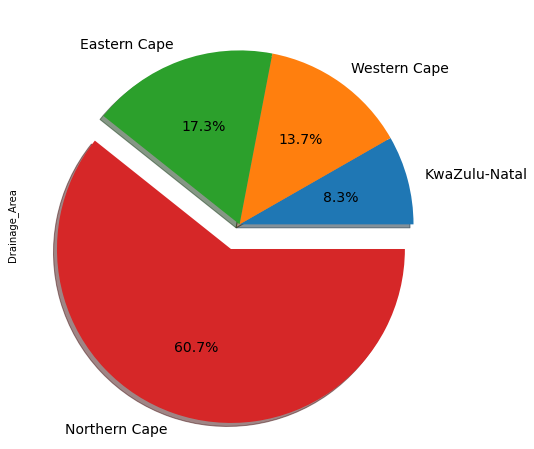

In [34]:
data2.plot(kind='pie', shadow=True, figsize=(13,8), fontsize=14, autopct='%1.1f%%', explode=(0, 0, 0, 0.15))

### <font color='green'> Find largest estuary in each province by drainage area</font>

In [35]:
 south_african_estuaries.groupby('Province').max().reset_index()

,Province,Name,Location,River,Drainage_Area,Latitude,Longitude
0,Eastern Cape,Xora Estuary,north of East London,Xora,34635,-31.100000,30.166667
1,KwaZulu-Natal,Thukela (tugela) Estuary,south of Port Edward,Tugela,29101,-28.383333,32.416667
2,Northern Cape,Orange Estuary (Gariep),border Namibia north of Port Nolloth,Orange,549700,-28.633333,16.450000
3,Western Cape,Verloren Estuary,west of Mossel Bay,Verlorenvlei,46220,-31.700000,23.383333


## PART 3: PLOTTING MAPS

### Get the GPS Coordinates for South Africa in DD format.

#### Latitude: 28° 28' 59.592"
#### Longitude: 24° 40' 37.189"

In [36]:
def dms_to_dd(lat, long):
    
    import re
        
    lat_deg, lat_min, lat_sec, lat_dir = re.split('[^\d\.A-Z]+', lat)
    long_deg, long_min, long_sec, long_dir = re.split('[^\d\.A-Z]+', long)

    lat_dd = float(lat_deg) + float(lat_min)/60 + float(lat_sec)/(60*60);
    long_dd = float(long_deg) + float(long_min)/60 + float(long_sec)/(60*60);
    
    if lat_dir == 'S':
        lat_dd *= -1
    if long_dir == 'W':
        long_dd *= -1
    return f'{lat_dd:.6f}, {long_dd:.6f}';

lat_long_coordinates = dms_to_dd("""28º28'59.592"S""", """24º40'37.189"E""")  # call the conversion function

latitude = lat_long_coordinates.split(',')[0]
longitude = lat_long_coordinates.split(',')[1]

print(f'Latitude: {latitude}, Longitude: {longitude}.')

Latitude: -28.483220, Longitude:  24.676997.


In [37]:
south_african_estuaries.head()

,Name,Province,Location,River,Drainage_Area,Latitude,Longitude
0,St Lucia Estuary,KwaZulu-Natal,Richards Bay,,9542,-28.383333,32.416667
1,Mfolozi/Msunduzi Estuary,KwaZulu-Natal,Richards Bay,"Mfolozi River, and Msunduzi",11068,-28.400000,32.416667
2,Richards Bay/Mhlathuze Estuary,KwaZulu-Natal,Richards Bay,Mhlathuze,3670,-28.850000,32.050000
3,Mlalazi Estuary,KwaZulu-Natal,Richards Bay,Mlalazi,492,-28.950000,31.816667
4,Matigulu/Nyoni Estuary,KwaZulu-Natal,Richards Bay,Matigulu River and Nyoni,900,-29.083333,31.633333


In [38]:
# make new data frame to input geometry points
# Remove the Location and River columns

estuaries_geo = south_african_estuaries[['Name', 'Province', 'Drainage_Area', 'Latitude', 'Longitude']]

estuaries_geo.head(10)

,Name,Province,Drainage_Area,Latitude,Longitude
0,St Lucia Estuary,KwaZulu-Natal,9542,-28.383333,32.416667
1,Mfolozi/Msunduzi Estuary,KwaZulu-Natal,11068,-28.400000,32.416667
2,Richards Bay/Mhlathuze Estuary,KwaZulu-Natal,3670,-28.850000,32.050000
3,Mlalazi Estuary,KwaZulu-Natal,492,-28.950000,31.816667
4,Matigulu/Nyoni Estuary,KwaZulu-Natal,900,-29.083333,31.633333
5,Thukela (tugela) Estuary,KwaZulu-Natal,29101,-29.216667,31.500000
6,Mvoti Estuary,KwaZulu-Natal,2829,-29.400000,31.333333
7,Mgeni Estuary,KwaZulu-Natal,4432,-29.800000,31.033333
8,Durban Bay,KwaZulu-Natal,264,-29.866667,31.066667
9,Mkomazi Estuary,KwaZulu-Natal,4310,-30.200000,30.800000


#### Create a GeodataFrame from estuaries_geo dataframe

In [39]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [40]:
gdf = gpd.GeoDataFrame(estuaries_geo, geometry=gpd.points_from_xy(estuaries_geo.Longitude, estuaries_geo.Latitude))

gdf.head()

,Name,Province,Drainage_Area,Latitude,Longitude,geometry
0,St Lucia Estuary,KwaZulu-Natal,9542,-28.383333,32.416667,POINT (32.41667 -28.38333)
1,Mfolozi/Msunduzi Estuary,KwaZulu-Natal,11068,-28.400000,32.416667,POINT (32.41667 -28.40000)
2,Richards Bay/Mhlathuze Estuary,KwaZulu-Natal,3670,-28.850000,32.050000,POINT (32.05000 -28.85000)
3,Mlalazi Estuary,KwaZulu-Natal,492,-28.950000,31.816667,POINT (31.81667 -28.95000)
4,Matigulu/Nyoni Estuary,KwaZulu-Natal,900,-29.083333,31.633333,POINT (31.63333 -29.08333)


#### Load shapefiles for South Africa and South African provinces

In [41]:
import geopandas as gpd
import matplotlib.pyplot as plt

# shapefile for South Africa
full_data_sa = gpd.read_file(r"C:\Users\MMSIBANDA\Desktop\PWD_DataScience\DataScienceTutorials\MarineDataScience\SouthAfrica_Bound.shp")

# shapefile containing outh African provinces
full_data_provinces = gpd.read_file(r"C:\Users\MMSIBANDA\Desktop\PWD_DataScience\DataScienceTutorials\MarineDataScience\South_Africa_Polygon.shp")

full_data_sa.head()

,id,country,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,note,path,rpath,iso3166_2,geometry
0,87565,ZAF,South Africa,South Africa,South Africa,Republic of South Africa,administrative,2,Q258,en:South Africa,2020-01-03 22:58:02,None,"0,87565","87565,0",None,"MULTIPOLYGON (((37.74444 -46.82813, 37.74555 -..."


In [42]:
full_data_provinces.head()

,id,country,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,note,path,rpath,iso3166_2,geometry
0,88574,ZAF,Eastern Cape,None,Eastern Cape,None,administrative,4,Q130840,None,2019-10-31 23:10:02,None,"0,87565,88574","88574,87565,0",ZA-EC,"MULTIPOLYGON (((29.10961 -32.04083, 29.10993 -..."
1,92417,ZAF,Free State,Free State,Free State,None,administrative,4,Q160284,en:Free State (province),2019-12-28 22:57:02,None,"0,87565,92417","92417,87565,0",ZA-FS,"POLYGON ((24.34662 -29.65593, 24.34752 -29.654..."
2,349344,ZAF,Gauteng,None,Gauteng,None,administrative,4,Q133083,None,2019-10-31 23:10:02,None,"0,87565,349344","349344,87565,0",ZA-GT,"POLYGON ((27.15634 -26.52431, 27.17857 -26.520..."
3,349390,ZAF,KwaZulu-Natal,None,KwaZulu-Natal,None,administrative,4,Q81725,None,2019-12-12 22:59:01,None,"0,87565,349390","349390,87565,0",ZA-NL,"MULTIPOLYGON (((30.19341 -31.08340, 30.19392 -..."
4,349547,ZAF,Limpopo,None,Limpopo,None,administrative,4,Q134907,None,2019-11-17 22:58:02,None,"0,87565,349547","349547,87565,0",ZA-LP,"POLYGON ((26.40754 -24.64938, 26.40765 -24.648..."


In [43]:
# check the coordinate reference system for the shapefiles

print('CRS - sa_bound geodataframe: ', full_data_sa.crs)
print('CRS - sa_provinces geodataframe: ', full_data_provinces.crs)

CRS - sa_bound geodataframe:  epsg:4326
CRS - sa_provinces geodataframe:  epsg:4326


In [44]:
# select a subset of the columns since we wont be using all the data

data_sa = full_data_sa.loc[:, ["id", "name", "geometry"]].copy()

data_sa.head()

,id,name,geometry
0,87565,South Africa,"MULTIPOLYGON (((37.74444 -46.82813, 37.74555 -..."


In [45]:
# select a subset of the columns since we wont be using all the data

provinces = full_data_provinces.loc[:, ["id", "name", "geometry"]].copy()
provinces.head()

,id,name,geometry
0,88574,Eastern Cape,"MULTIPOLYGON (((29.10961 -32.04083, 29.10993 -..."
1,92417,Free State,"POLYGON ((24.34662 -29.65593, 24.34752 -29.654..."
2,349344,Gauteng,"POLYGON ((27.15634 -26.52431, 27.17857 -26.520..."
3,349390,KwaZulu-Natal,"MULTIPOLYGON (((30.19341 -31.08340, 30.19392 -..."
4,349547,Limpopo,"POLYGON ((26.40754 -24.64938, 26.40765 -24.648..."


<AxesSubplot:>

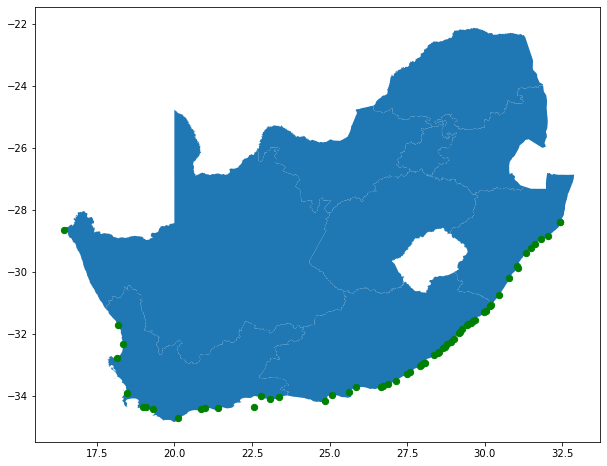

In [46]:
fig, ax = plt.subplots(figsize=(13,8))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Subsets the GeoDataFrame
sa = world[world.name == "South Africa"]

# Plots
sa.plot(color='white', ax=ax);
provinces.plot(linestyle=':', markersize=10, ax=ax)
gdf.plot(color='green', markersize=40, ax=ax)

## Intercative map showing location of estuaries in each province

In [47]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [48]:
# Create a map
m = folium.Map(location=[-28.483220, 24.676997], tiles='Stamen Terrain', zoom_start=6)

for Latitude, Longitude, Name, Province, Drainage_Area in zip(gdf['Latitude'], gdf['Longitude'], gdf['Name'], 
                                                              gdf['Province'], gdf['Drainage_Area']):
        folium.Marker([Latitude, Longitude],
                       tooltip = ('Name: ' + str(Name).capitalize() + '<br>'
                                'Province: ' + str(Province) + '<br>'
                                'Drainage: ' + str(Drainage_Area) +' sq.km')).add_to(m)

# Display the map
display(m)       